In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [5]:
X=df.drop(columns=['Survived'])
y=df['Survived']


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [8]:
print('Original Age variable variance' ,X_train['Age_99'].var())
print('Original Fare variable variance' ,X_train['Fare_999'].var())

print('Age Variance after mean imputation' ,X_train['Age_minus1'].var())
print('Fare Variance after mean imputation' ,X_train['Fare_minus1'].var())



Original Age variable variance 951.7275570187172
Original Fare variable variance 47219.20265217623
Age Variance after mean imputation 318.0896202624484
Fare Variance after mean imputation 2378.5676784883503


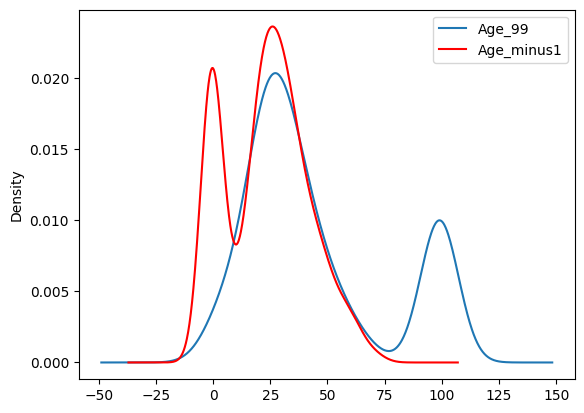

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age_99'].plot(kind='kde',ax=ax)
X_train['Age_minus1'].plot(kind='kde',ax=ax,color='red')


lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

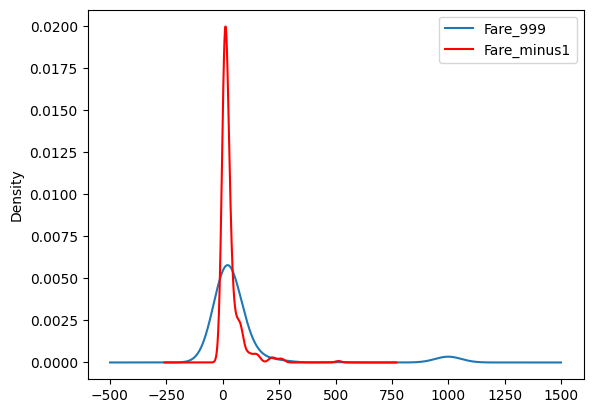

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare_999'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')